## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
import tensorflow as tf
import keras

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
""

### Find dimensions of an image in the dataset

In [0]:
y_train[0:2]

array([9, 0], dtype=uint8)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#reshape the data.
trainX=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
testX=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [0]:
#trainX = x_train.astype('float32')
#testX = x_test.astype('float32')
trainX /= 255
testX /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
#model.add(tf.keras.layers.BatchNormalization())

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) #stride 2

#model.add(tf.keras.layers.Conv2D(10,kernel_size=(1,1), activation='relu'))

#model.add(tf.keras.layers.GlobalAveragePooling2D())
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [0]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 279us/sample - loss: 1.7559 - acc: 0.7053 - val_loss: 1.7074 - val_acc: 0.7540
Epoch 2/10
60000/60000 [==============================] - 16s 273us/sample - loss: 1.7048 - acc: 0.7562 - val_loss: 1.7046 - val_acc: 0.7566
Epoch 3/10
60000/60000 [==============================] - 17s 275us/sample - loss: 1.6983 - acc: 0.7630 - val_loss: 1.7059 - val_acc: 0.7551
Epoch 4/10
60000/60000 [==============================] - 16s 270us/sample - loss: 1.6942 - acc: 0.7667 - val_loss: 1.6751 - val_acc: 0.7852
Epoch 5/10
60000/60000 [==============================] - 16s 269us/sample - loss: 1.6419 - acc: 0.8190 - val_loss: 1.6301 - val_acc: 0.8301
Epoch 6/10
60000/60000 [==============================] - 16s 268us/sample - loss: 1.6236 - acc: 0.8369 - val_loss: 1.6302 - val_acc: 0.8306
Epoch 7/10
60000/60000 [==============================] - 16s 268us/sample - loss: 1.6160 - acc: 0.8448 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:

tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
#model.add(tf.keras.layers.BatchNormalization())
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) #stride 2

#model.add(tf.keras.layers.Conv2D(10,kernel_size=(1,1), activation='relu'))

#model.add(tf.keras.layers.GlobalAveragePooling2D())


#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,batch_size=32, callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 255us/sample - loss: 1.6618 - acc: 0.8001 - val_loss: 1.6134 - val_acc: 0.8467
Epoch 2/10
60000/60000 [==============================] - 15s 252us/sample - loss: 1.5923 - acc: 0.8687 - val_loss: 1.5980 - val_acc: 0.8625
Epoch 3/10
60000/60000 [==============================] - 15s 257us/sample - loss: 1.5799 - acc: 0.8809 - val_loss: 1.5871 - val_acc: 0.8730
Epoch 4/10
60000/60000 [==============================] - 15s 255us/sample - loss: 1.5726 - acc: 0.8878 - val_loss: 1.5931 - val_acc: 0.8681
Epoch 5/10
60000/60000 [==============================] - 15s 252us/sample - loss: 1.5667 - acc: 0.8942 - val_loss: 1.5713 - val_acc: 0.8890
Epoch 6/10
60000/60000 [==============================] - 15s 256us/sample - loss: 1.5619 - acc: 0.8990 - val_loss: 1.5698 - val_acc: 0.8914
Epoch 7/10
60000/60000 [==============================] - 15s 255us/sample - loss: 1.5577 - acc: 0.9031 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
#datagen.fit(trainX)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


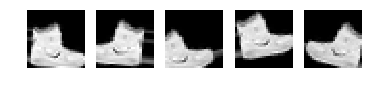

In [80]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [88]:
model.fit_generator(datagen.flow(trainX, trainY, batch_size=32),validation_data=(testX,testY),
                    steps_per_epoch=len(trainX) / 32, epochs=10)

Epoch 1/10
  13/1875 [..............................] - ETA: 29s - loss: 1.6751 - acc: 0.7861

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 30s 16ms/step - loss: 1.7032 - acc: 0.7575 - val_loss: 1.6401 - val_acc: 0.8212
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 1.6983 - acc: 0.7624 - val_loss: 1.6747 - val_acc: 0.7864
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 1.6967 - acc: 0.7641 - val_loss: 1.6855 - val_acc: 0.7751
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 1.6951 - acc: 0.7657 - val_loss: 1.6493 - val_acc: 0.8114
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 1.6898 - acc: 0.7710 - val_loss: 1.6506 - val_acc: 0.8107
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 1.6918 - acc: 0.7691 - val_loss: 1.6496 - val_acc: 0.8116
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 1.6914 - acc: 0.7692 - val_loss: 1.6369 - val_acc: 0.8243
Epoch 8/10
1875/1875 [==============================] - 30s

###  Report the final train and validation accuracy

In [91]:
model.evaluate(testX,testY)

10000/10000 [==============================] - 1s 112us/sample - loss: 1.6368 - acc: 0.8244


[1.6367568542480468, 0.8244]

In [0]:
train accuracy : 0.7730
test accuracy : val_acc: 0.8244
    validation accuracy :0.8244
  

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [206]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
trainX = x_train.astype('float32')
testX = x_test.astype('float32')
trainX /= 255
testX /= 255

In [0]:
#reshape the data.
trainX1=trainX.reshape(trainX.shape[0],32,32,3)
testX1=testX.reshape(testX.shape[0],32,32,3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen_cifar = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True)

### **Prepare/fit the generator.**

In [0]:
datagen_cifar.fit(trainX1)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

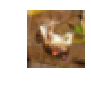

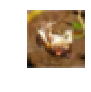

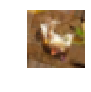

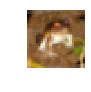

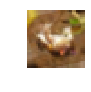

In [223]:
from matplotlib import pyplot as plt
gen = datagen_cifar.flow(trainX1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
    plt.show()